# Homework 

* Create derived statistic for slap and backhand shots
* Note, the analysis can be extended beyond the wrist shot model example
* Assess and report the derived statistics across relevant factors

In [35]:
%matplotlib inline
import os
import sys
import numpy 
import pandas 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# !pip install plotly

# imports regression library
# OLS: ordinary least squares (estimation technique used to estimate the linear regression model)
import statsmodels.api as sm
from statsmodels.formula.api import ols
    
# Set some Pandas options
pandas.set_option('display.notebook_repr_html', True)
pandas.set_option('display.max_columns', 20)
pandas.set_option('display.max_rows', 50)

from decimal import getcontext, Decimal
# Set the precision.
getcontext().prec = 2

In [36]:
dm = pandas.read_csv('shots.csv')
dm = dm[(dm['advantagetypeshooter']=='EV')] 
dm = dm[dm['zone']=="O"]

In [37]:
dm.head()

,season,gamenumber,gamedate,vteamcode,hteamcode,eventnumber,period,eventtimefromzero,advantagetypeshooter,advantagetypegoalie,...,position,namegoalie,tgoals,ogoals,zone,X,Y,XNorm,YNorm,shotType
0,2011,20001,10/6/2011,PHI,BOS,4,1,47,EV,EV,...,G,BRYZGALOV_ILYA,0,0,O,32,-14,32,-14,Snap
1,2011,20001,10/6/2011,PHI,BOS,9,1,114,EV,EV,...,G,BRYZGALOV_ILYA,0,0,O,37,-18,37,-18,Snap
2,2011,20001,10/6/2011,PHI,BOS,14,1,138,EV,EV,...,G,THOMAS_TIM,0,0,O,-50,7,50,-7,Snap
3,2011,20001,10/6/2011,PHI,BOS,25,1,249,EV,EV,...,G,THOMAS_TIM,0,0,O,-48,-5,48,5,Slap
4,2011,20001,10/6/2011,PHI,BOS,29,1,297,EV,EV,...,G,BRYZGALOV_ILYA,0,0,O,39,-1,39,-1,Wrist


In [38]:
dm.describe()

,season,gamenumber,eventnumber,period,eventtimefromzero,isTHome,playernumber,tgoals,ogoals,X,Y,XNorm,YNorm
count,57186.0,57186.000000,57186.000000,57186.000000,57186.00000,57186.000000,57186.000000,57186.000000,57186.000000,57186.000000,57186.000000,57186.000000,57186.000000
mean,2011.0,20621.982094,154.552303,2.034432,584.16901,0.485433,29.926486,1.304480,1.180569,0.264016,-0.178663,62.067604,-0.376613
std,0.0,354.047357,89.652301,0.850648,346.91897,0.499792,13.608431,1.364192,1.280953,64.288069,19.317856,16.750245,19.315011
min,2011.0,20001.000000,3.000000,1.000000,4.00000,0.000000,1.000000,0.000000,0.000000,-99.000000,-42.000000,26.000000,-42.000000
25%,2011.0,20318.000000,77.000000,1.000000,277.00000,0.000000,30.000000,0.000000,0.000000,-64.000000,-15.000000,49.000000,-15.000000
50%,2011.0,20625.000000,154.000000,2.000000,573.00000,0.000000,31.000000,1.000000,1.000000,28.000000,0.000000,64.000000,-1.000000
75%,2011.0,20928.000000,229.000000,3.000000,885.00000,1.000000,35.000000,2.000000,2.000000,64.000000,14.000000,77.000000,14.000000
max,2011.0,21230.000000,392.000000,4.000000,1200.00000,1.000000,70.000000,9.000000,9.000000,97.000000,42.000000,99.000000,42.000000


In [39]:
dm.groupby(['eventtype'])[['XNorm', 'YNorm']].describe()

XNorm         YNorm
eventtype                                  
GOAL      count   4678.000000   4678.000000
          mean      70.962591     -0.132535
          std       13.088705     12.242820
          min       27.000000    -39.000000
          25%       64.000000     -6.000000
          50%       75.000000      0.000000
          75%       81.000000      6.000000
          max       97.000000     40.000000
SHOT      count  52508.000000  52508.000000
          mean      61.275139     -0.398358
          std       16.811628     19.822985
          min       26.000000    -42.000000
          25%       48.000000    -16.000000
          50%       63.000000     -1.000000
          75%       77.000000     15.000000
          max       99.000000     42.000000

In [40]:
pandas.crosstab(dm['shotType'], dm['eventtype'], margins=True)

eventtype,GOAL,SHOT,All
shotType,,,
Backhand,513,4709,5222
Deflected,172,701,873
Slap,545,10716,11261
Snap,681,7574,8255
Tip-In,432,1927,2359
Wrap-around,49,897,946
Wrist,2286,25984,28270
All,4678,52508,57186


In [41]:
dm['isgoal'] = dm['eventtype']=='GOAL'
dm['XNormAdj'] = 99 - dm['XNorm']
dm.groupby(['eventtype'])[['XNormAdj', 'YNorm']].describe()

XNormAdj         YNorm
eventtype                                  
GOAL      count   4678.000000   4678.000000
          mean      28.037409     -0.132535
          std       13.088705     12.242820
          min        2.000000    -39.000000
          25%       18.000000     -6.000000
          50%       24.000000      0.000000
          75%       35.000000      6.000000
          max       72.000000     40.000000
SHOT      count  52508.000000  52508.000000
          mean      37.724861     -0.398358
          std       16.811628     19.822985
          min        0.000000    -42.000000
          25%       22.000000    -16.000000
          50%       36.000000     -1.000000
          75%       51.000000     15.000000
          max       73.000000     42.000000

In [62]:
dm['XNormAdj'] = dm['XNormAdj'] + 1
dm['YNormAdj'] = numpy.absolute(dm['YNorm'])
dm['YNormAdj'] = dm['YNormAdj'] + 1

dm['lnX'] = numpy.log(dm['XNormAdj'])
dm['lnY'] = numpy.log(dm['YNormAdj'])

dm['dscore'] = dm['tgoals'] - dm['ogoals']
dm['oteamcode'] = dm.apply(lambda x: 1 if (x['teamcode'] == x['hteamcode']) else x['vteamcode'], axis=1)

In [63]:
dw = dm[dm['shotType']=='Slap']

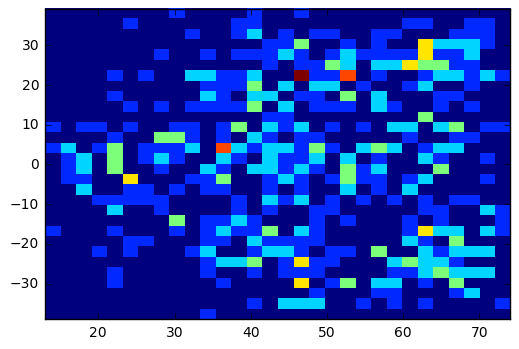

In [64]:
dg = dw[dw['eventtype']=='GOAL']

plt.hist2d(dg['XNormAdj'], dg['YNorm'],bins=30)
plt.show()

Optimization terminated successfully.
         Current function value: 0.317755
         Iterations 7
        Logit Marginal Effects       
Dep. Variable:                 isgoal
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
lnX           -0.0811      0.014     -5.821      0.000        -0.108    -0.054


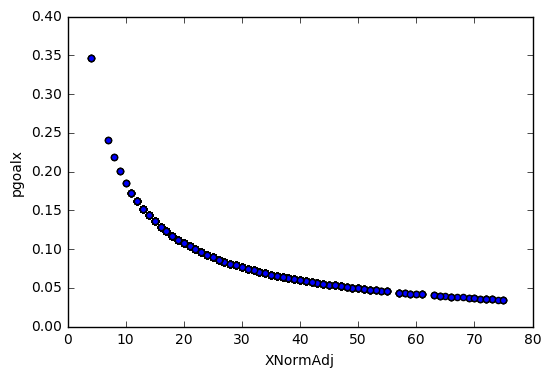

In [88]:
m1 = sm.Logit(dw['isgoal'], sm.add_constant(dw['lnX'])).fit()
print m1.get_margeff(method='dydx', at='overall').summary()

# Generate predicted values and predict results
dw.ix[:, 'pgoalx'] = m1.predict()
dw.plot(kind='scatter',x='XNormAdj', y='pgoalx')

Each percent increase in length from the net decrease the probability of a goal by 0.08.

Optimization terminated successfully.
         Current function value: 0.301774
         Iterations 7
        Logit Marginal Effects       
Dep. Variable:                 isgoal
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
lnY           -0.0652      0.005    -13.630      0.000        -0.075    -0.056


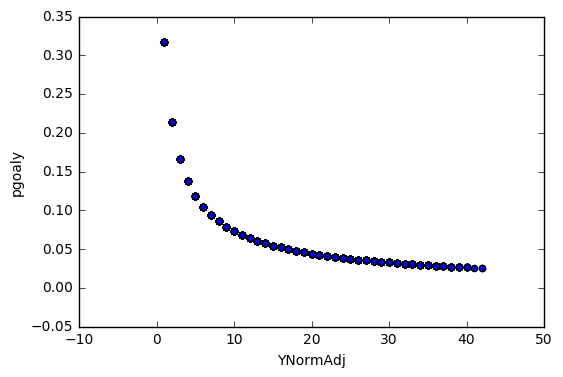

In [89]:
m2 = sm.Logit(dw['isgoal'], sm.add_constant(dw['lnY'])).fit()
print m2.get_margeff(method='dydx', at='overall').summary()

# Generate predicted values and predict results
dw.ix[:, 'pgoaly'] = m2.predict()
dw.plot(kind='scatter', x='YNormAdj', y='pgoaly')



Each percent increase in width  decrease the probability of a goal by 0.065.

In [90]:
m3 = sm.Logit(dw['isgoal'], sm.add_constant(dw[['lnX', 'lnY']])).fit()
print m3.get_margeff(method='dydx', at='overall').summary()
dw.ix[:, 'pgoal'] = m3.predict()

Optimization terminated successfully.
         Current function value: 0.297750
         Iterations 7
        Logit Marginal Effects       
Dep. Variable:                 isgoal
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
lnX           -0.0946      0.015     -6.275      0.000        -0.124    -0.065
lnY           -0.0682      0.005    -13.764      0.000        -0.078    -0.059


Each percent increase in length and width decreases the probability of a goal by 0.95 and 0.68, respectively.

In [91]:
dw.describe()

,season,gamenumber,eventnumber,period,eventtimefromzero,isTHome,playernumber,tgoals,ogoals,X,...,XNorm,YNorm,XNormAdj,YNormAdj,lnX,lnY,dscore,pgoalx,pgoaly,pgoal
count,5222.0,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,...,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000
mean,2011.0,20622.310417,155.463807,2.038491,587.949828,0.479127,29.869590,1.316162,1.195136,-0.116047,...,76.662581,-2.464764,24.337419,11.243010,3.139851,2.103069,0.121026,0.098238,0.098238,0.098238
std,0.0,350.455459,90.302794,0.852822,347.328575,0.499612,13.707482,1.362129,1.287614,77.157743,...,8.663355,13.260413,8.663355,8.773563,0.313691,0.844278,1.524210,0.024806,0.062573,0.067221
min,2011.0,20001.000000,3.000000,1.000000,5.000000,0.000000,1.000000,0.000000,0.000000,-97.000000,...,26.000000,-41.000000,4.000000,1.000000,1.386294,0.000000,-8.000000,0.034392,0.025408,0.006904
25%,2011.0,20323.000000,77.000000,1.000000,276.250000,0.000000,30.000000,0.000000,0.000000,-79.000000,...,73.000000,-10.000000,19.000000,5.000000,2.944439,1.609438,-1.000000,0.081161,0.054491,0.048594
50%,2011.0,20623.000000,156.000000,2.000000,577.500000,0.000000,31.000000,1.000000,1.000000,-37.500000,...,79.000000,-2.000000,22.000000,9.000000,3.091042,2.197225,0.000000,0.099359,0.078701,0.084981
75%,2011.0,20923.000000,230.000000,3.000000,894.750000,1.000000,35.000000,2.000000,2.000000,79.000000,...,82.000000,5.000000,28.000000,15.000000,3.332205,2.708050,1.000000,0.112124,0.118441,0.128164
max,2011.0,21230.000000,389.000000,4.000000,1200.000000,1.000000,70.000000,9.000000,9.000000,97.000000,...,97.000000,39.000000,75.000000,42.000000,4.317488,3.737670,8.000000,0.346854,0.317063,0.454971


In [69]:
# season
dw.groupby(['season'])[['isgoal', 'pgoal']].sum()

,isgoal,pgoal
season,,
2011,545.0,545.0


In [70]:
# period
dw.groupby(['period'])[['isgoal', 'pgoal']].sum()

,isgoal,pgoal
period,,
1,158.0,170.139055
2,198.0,183.265820
3,178.0,178.392990
4,11.0,13.202136


In [71]:
# score differential
dw.groupby(['dscore'])[['isgoal', 'pgoal']].sum()

,isgoal,pgoal
dscore,,
-9,0.0,0.040168
-8,0.0,0.091672
-7,1.0,0.124270
-6,1.0,0.448284
-5,1.0,1.750652
-4,10.0,7.355237
-3,17.0,13.801744
-2,53.0,38.410720
-1,99.0,91.782726


In [72]:
# defensive team
dw.groupby(['teamcode'])[['isgoal', 'pgoal']].sum()

,isgoal,pgoal
teamcode,,
ANA,27.0,16.994646
BOS,18.0,16.348921
BUF,21.0,21.228408
CAR,15.0,18.608935
CBJ,22.0,20.265289
CGY,25.0,17.741634
CHI,19.0,21.242435
COL,17.0,17.258106
DAL,23.0,20.282823


In [100]:
# offensive team
dw.groupby(['oteamcode'])[['isgoal', 'pgoal']].sum()

,isgoal,pgoal
oteamcode,,
1,220.0,238.497222
ANA,12.0,10.232062
BOS,9.0,7.529825
BUF,11.0,10.854435
CAR,12.0,9.678654
CBJ,13.0,8.016980
CGY,10.0,8.699636
CHI,11.0,8.092103
COL,12.0,9.209905


In [74]:
dw = dm[dm['shotType']=='Backhand']

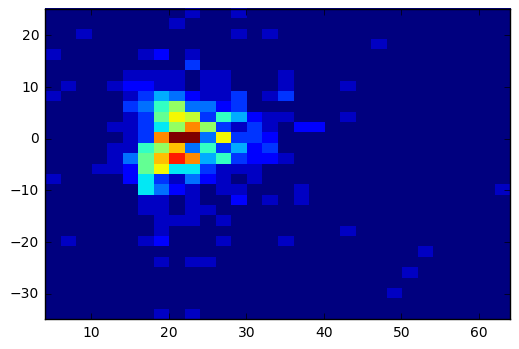

In [75]:
dg = dw[dw['eventtype']=='GOAL']

plt.hist2d(dg['XNormAdj'], dg['YNorm'],bins=30)
plt.show()

Optimization terminated successfully.
         Current function value: 0.317755
         Iterations 7
        Logit Marginal Effects       
Dep. Variable:                 isgoal
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
lnX           -0.0811      0.014     -5.821      0.000        -0.108    -0.054


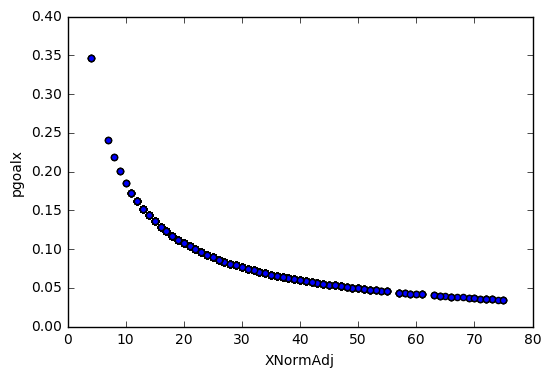

In [76]:
m1 = sm.Logit(dw['isgoal'], sm.add_constant(dw['lnX'])).fit()
print m1.get_margeff(method='dydx', at='overall').summary()

# Generate predicted values and predict results
dw.ix[:, 'pgoalx'] = m1.predict()
dw.plot(kind='scatter',x='XNormAdj', y='pgoalx')

Optimization terminated successfully.
         Current function value: 0.301774
         Iterations 7
        Logit Marginal Effects       
Dep. Variable:                 isgoal
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
lnY           -0.0652      0.005    -13.630      0.000        -0.075    -0.056


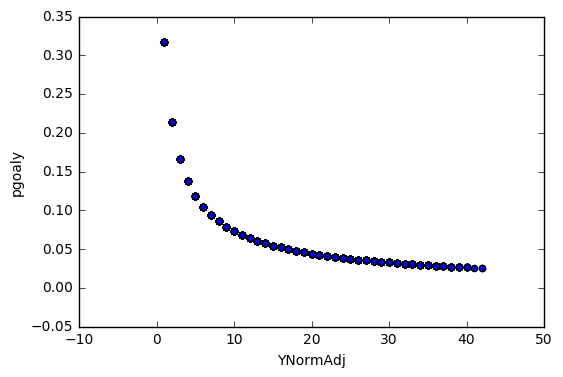

In [77]:
m2 = sm.Logit(dw['isgoal'], sm.add_constant(dw['lnY'])).fit()
print m2.get_margeff(method='dydx', at='overall').summary()

# Generate predicted values and predict results
dw.ix[:, 'pgoaly'] = m2.predict()
dw.plot(kind='scatter', x='YNormAdj', y='pgoaly')




In [93]:
m3 = sm.Logit(dw['isgoal'], sm.add_constant(dw[['lnX', 'lnY']])).fit()
print m3.get_margeff(method='dydx', at='overall').summary()
dw.ix[:, 'pgoal'] = m3.predict()

Optimization terminated successfully.
         Current function value: 0.297750
         Iterations 7
        Logit Marginal Effects       
Dep. Variable:                 isgoal
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
lnX           -0.0946      0.015     -6.275      0.000        -0.124    -0.065
lnY           -0.0682      0.005    -13.764      0.000        -0.078    -0.059


In [94]:
dw.describe()

,season,gamenumber,eventnumber,period,eventtimefromzero,isTHome,playernumber,tgoals,ogoals,X,...,XNorm,YNorm,XNormAdj,YNormAdj,lnX,lnY,dscore,pgoalx,pgoaly,pgoal
count,5222.0,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,...,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000
mean,2011.0,20622.310417,155.463807,2.038491,587.949828,0.479127,29.869590,1.316162,1.195136,-0.116047,...,76.662581,-2.464764,24.337419,11.243010,3.139851,2.103069,0.121026,0.098238,0.098238,0.098238
std,0.0,350.455459,90.302794,0.852822,347.328575,0.499612,13.707482,1.362129,1.287614,77.157743,...,8.663355,13.260413,8.663355,8.773563,0.313691,0.844278,1.524210,0.024806,0.062573,0.067221
min,2011.0,20001.000000,3.000000,1.000000,5.000000,0.000000,1.000000,0.000000,0.000000,-97.000000,...,26.000000,-41.000000,4.000000,1.000000,1.386294,0.000000,-8.000000,0.034392,0.025408,0.006904
25%,2011.0,20323.000000,77.000000,1.000000,276.250000,0.000000,30.000000,0.000000,0.000000,-79.000000,...,73.000000,-10.000000,19.000000,5.000000,2.944439,1.609438,-1.000000,0.081161,0.054491,0.048594
50%,2011.0,20623.000000,156.000000,2.000000,577.500000,0.000000,31.000000,1.000000,1.000000,-37.500000,...,79.000000,-2.000000,22.000000,9.000000,3.091042,2.197225,0.000000,0.099359,0.078701,0.084981
75%,2011.0,20923.000000,230.000000,3.000000,894.750000,1.000000,35.000000,2.000000,2.000000,79.000000,...,82.000000,5.000000,28.000000,15.000000,3.332205,2.708050,1.000000,0.112124,0.118441,0.128164
max,2011.0,21230.000000,389.000000,4.000000,1200.000000,1.000000,70.000000,9.000000,9.000000,97.000000,...,97.000000,39.000000,75.000000,42.000000,4.317488,3.737670,8.000000,0.346854,0.317063,0.454971


In [95]:
# season
dw.groupby(['season'])[['isgoal', 'pgoal']].sum()

,isgoal,pgoal
season,,
2011,513.0,513.0


In [96]:
# period
dw.groupby(['period'])[['isgoal', 'pgoal']].sum()

,isgoal,pgoal
period,,
1,162.0,165.489302
2,171.0,174.002293
3,171.0,163.377049
4,9.0,10.131356


In [97]:
# offensive team
dw.groupby(['oteamcode'])[['isgoal', 'pgoal']].sum()

,isgoal,pgoal
oteamcode,,
1,220.0,238.497222
ANA,12.0,10.232062
BOS,9.0,7.529825
BUF,11.0,10.854435
CAR,12.0,9.678654
CBJ,13.0,8.016980
CGY,10.0,8.699636
CHI,11.0,8.092103
COL,12.0,9.209905


In [98]:
# defensive team
dw.groupby(['teamcode'])[['isgoal', 'pgoal']].sum()

,isgoal,pgoal
teamcode,,
ANA,21.0,18.654731
BOS,15.0,15.485934
BUF,19.0,20.304397
CAR,17.0,19.254151
CBJ,20.0,16.169746
CGY,20.0,17.178840
CHI,21.0,15.605554
COL,16.0,15.064805
DAL,15.0,17.074046


In [99]:
# score differential
dw.groupby(['dscore'])[['isgoal', 'pgoal']].sum()


,isgoal,pgoal
dscore,,
-8,0.0,0.204273
-7,1.0,0.160504
-6,2.0,0.887112
-5,2.0,1.135571
-4,5.0,5.618234
-3,19.0,15.526196
-2,34.0,36.578577
-1,87.0,86.328413
0,186.0,192.528565
